<a href="https://colab.research.google.com/github/LeoD-h/Project-BCI-EEG/blob/main/DiscoverDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Début 22/11

In [3]:
!pip install moabb mne scikit-learn==1.5.2 numpy matplotlib

INFO: pip is looking at multiple versions of moabb to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.3/252.3 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.7/127.7 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.5.0
    Uninstalling urllib3-2.5.0:
      Successfully unin

In [4]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from moabb.datasets import BNCI2014001
from moabb.paradigms import MotorImagery


mne.set_log_level('WARNING')
print("Vérification de l'accès Drive...")
drive.mount('/content/drive')

drive_path = '/content/drive/MyDrive/mne_data'
mne.set_config('MNE_DATA', drive_path)

print("✅ Environnement prêt.")

Vérification de l'accès Drive...
Mounted at /content/drive
✅ Environnement prêt.


In [5]:
print("Chargement du dataset en mémoire...")

# Dataset (BCI Competition IV 2a)
dataset = BNCI2014001()

# Filtrage entre 8Hz et 32Hz (bandes Mu et Beta, spécifiques au mouvement)
paradigm = MotorImagery(events=['left_hand', 'right_hand'], n_classes=2, fmin=8, fmax=32)

# X = Données (Essais, Electrodes, Temps)
# y = Étiquettes (Gauche/Droite)
X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[1])

print(f"✅ Données chargées !")
print(f"   -> {X.shape[0]} essais disponibles")
print(f"   -> {X.shape[1]} électrodes par essai")
print(f"   -> {X.shape[2]} points de temps (échantillons)")

Chargement du dataset en mémoire...


/usr/local/lib/python3.12/dist-packages/moabb/datasets/download.py:60: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_PATH"
  set_config(key, get_config("MNE_DATA"))
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bnci-horizon-2020.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1064: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|█████████████████████████████████████| 42.8M/42.8M [00:00<00:00, 50.9GB/s]
SHA256 hash of downloaded file: 054f02e70cf9c4ada1517e9b9864f45407939c1062c6793516585c6f511d0325
Use this

✅ Données chargées !
   -> 288 essais disponibles
   -> 22 électrodes par essai
   -> 1001 points de temps (échantillons)


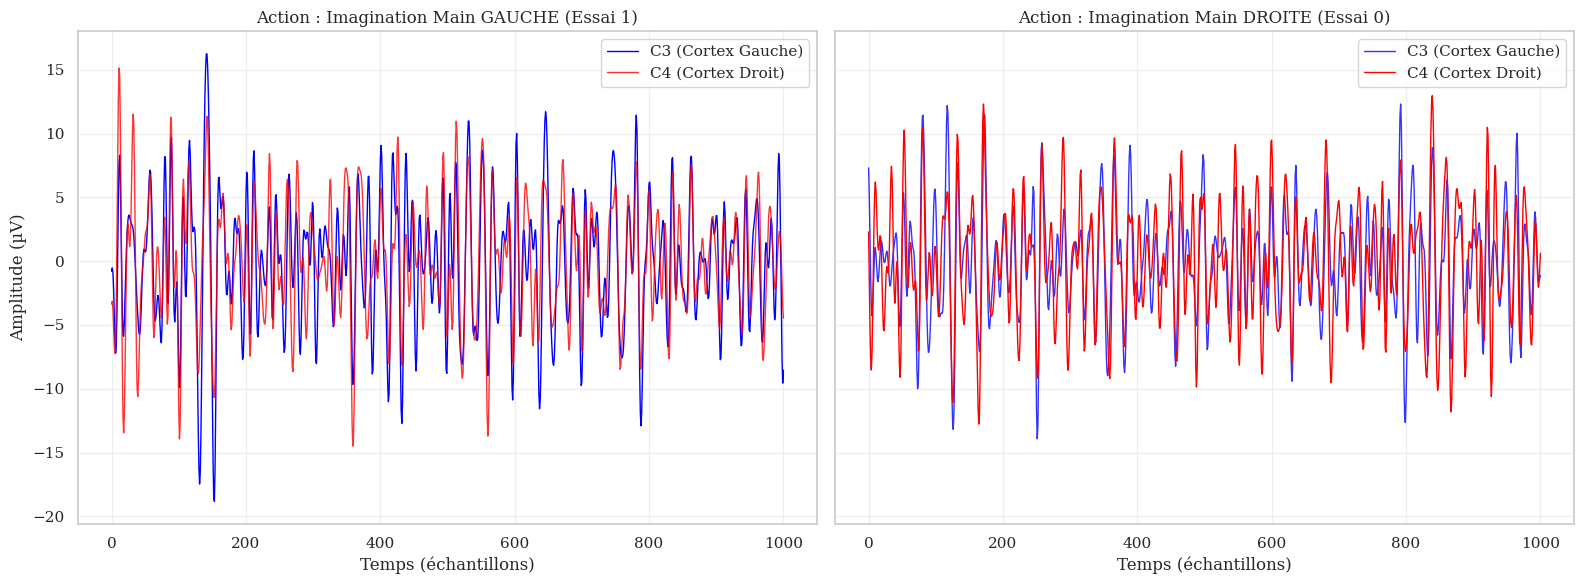

In [6]:
index_gauche = np.where(y == 'left_hand')[0][0]  # Premier essai 'Main Gauche'
index_droite = np.where(y == 'right_hand')[0][0] # Premier essai 'Main Droite'

C3_idx = 7   # Hémisphère Gauche (Gère droite)
C4_idx = 11  # Hémisphère Droit (Gère gauche)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 1. GRAPHIQUE GAUCHE (Le patient imagine "MAIN GAUCHE")
# On s'attend à voir une réaction sur C4 (Droit)
axes[0].plot(X[index_gauche, C3_idx, :], label='C3 (Cortex Gauche)', color='blue', linewidth=1)
axes[0].plot(X[index_gauche, C4_idx, :], label='C4 (Cortex Droit)', color='red', alpha=0.8, linewidth=1)
axes[0].set_title(f"Action : Imagination Main GAUCHE (Essai {index_gauche})")
axes[0].set_ylabel("Amplitude (µV)")
axes[0].set_xlabel("Temps (échantillons)")
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# 2. GRAPHIQUE DROIT (Le patient imagine "MAIN DROITE")
# On s'attend à voir une réaction sur C3 (Gauche)
axes[1].plot(X[index_droite, C3_idx, :], label='C3 (Cortex Gauche)', color='blue', alpha=0.8, linewidth=1)
axes[1].plot(X[index_droite, C4_idx, :], label='C4 (Cortex Droit)', color='red', linewidth=1)
axes[1].set_title(f"Action : Imagination Main DROITE (Essai {index_droite})")
axes[1].set_xlabel("Temps (échantillons)")
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
print(f"Forme de X : {X.shape}")
#(N_Essais, 22_Electrodes, 1001_Points_de_Temps)
# N_Essais : C'est le nombre d'exemples (ex: 576 exercices faits par le patient)

# 2. La forme de la réponse (Le Vecteur)
print(f"Forme de y_encoded : {y_encoded.shape}")
# C'est une liste de 0 et de 1.

# 3. L'équilibre des classes
count_0 = np.sum(y_encoded == 0)
count_1 = np.sum(y_encoded == 1)
print(f"Nombre d'exemples 'Main Gauche' (0) : {count_0}")
print(f"Nombre d'exemples 'Main Droite' (1) : {count_1}")
# C'est important que ce soit équilibré (50/50), sinon l'IA triche.

# 4. Voir un exemple concret (Les chiffres bruts)
print("\nExemple de signal (1er essai, 1ère électrode, 5 premiers points) :")
print(X[0, 0, :5])
# Tu verras des chiffres minuscules (ex: 0.000012). C'est des Volts.

Forme de X : (288, 22, 1001)
Forme de y_encoded : (288,)
Nombre d'exemples 'Main Gauche' (0) : 144
Nombre d'exemples 'Main Droite' (1) : 144

Exemple de signal (1er essai, 1ère électrode, 5 premiers points) :
[ 6.12675343  4.80069492  1.8937593  -1.663054   -4.5459792 ]


In [9]:

from sklearn.preprocessing import LabelEncoder
from mne.decoding import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, ShuffleSplit
import numpy as np


In [15]:
# C3 : Gauche
# C4 : Droite

# Main Droite :
# C3 Faible (2/10)
# C4 Fort (8/10)
# Variance = 8 - 2 = +6

# Main Gauche :
# C3 Fort (8/10)
# C4 Faible (2/10)
# Variance = 2 - 8 = -6


# ENCODAGE (Texte -> Chiffres)
print("Encodage des labels en cours...")
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print(f"✅ Encodage terminé : 'left_hand'={encoder.transform(['left_hand'])[0]}, 'right_hand'={encoder.transform(['right_hand'])[0]}")

# --- 2. CONSTRUCTION DU PIPELINE ML (CSP + LDA) ---
print("Construction du Pipeline ML...")

# CSP : Cherche les filtres spatiaux (4 composantes)
csp = CSP(n_components=6, reg=None, log=True, norm_trace=False)

# LDA : Trace la ligne de séparation
lda = LinearDiscriminantAnalysis()

# On assemble les deux dans une boîte noire
clf = make_pipeline(csp, lda)

# --- 3. ENTRAÎNEMENT ET TEST (Cross-Validation) ---
print("Lancement de la Cross-Validation (10 essais)...")

# On prépare le test : on mélange et on garde 20% pour tester à chaque fois
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# C'est ici que ça plantait avant : maintenant y_encoded existe !
scores = cross_val_score(clf, X, y_encoded, cv=cv, n_jobs=1)

# --- 4. RÉSULTATS ---
print("\n" + "="*40)
print(f"RESULTATS FINAUX (Précision) :")
print(f"Scores détaillés : {np.round(scores, 2)}")
print(f"🏆 MOYENNE : {scores.mean() * 100:.2f}%")
print("="*40)

if scores.mean() > 0.7:
    print("✅ SUCCÈS : Ton modèle distingue clairement Gauche vs Droite !")
else:
    print("⚠️ SCORE MOYEN : C'est normal au début, on pourra optimiser le CSP.")

Encodage des labels en cours...
✅ Encodage terminé : 'left_hand'=0, 'right_hand'=1
Construction du Pipeline ML...
Lancement de la Cross-Validation (10 essais)...

RESULTATS FINAUX (Précision) :
Scores détaillés : [0.93 0.84 0.83 0.9  0.95 0.86 0.9  0.88 0.88 0.9 ]
🏆 MOYENNE : 88.62%
✅ SUCCÈS : Ton modèle distingue clairement Gauche vs Droite !
